In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import cross_validation, preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices

 

import scipy.stats 
import random


%matplotlib inline



In [4]:
Data = pd.read_csv(r"C:\Users\Pardhu CooL\koushik_gadi_lolli\german_credit.csv")
print(Data.columns)
#

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')


In [5]:
"""Account Balance: No account (1), None (No balance) (2), Some Balance (3)
Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)
Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM
Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7
Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female
No of Credits at this bank: 1, More than 1
Guarantor: None, Yes
Concurrent Credits: Other Banks or Dept Stores, None
ForeignWorker variable may be dropped from the study
Purpose of Credit: New car, Used car, Home Related, Other"""

print("Number of observations: ", len(Data))
Data.head(10)


Number of observations:  1000


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [6]:
### Checking for missing values 
for col in Data:
    print(col, ": ", sum(Data[col].isnull()))

    

Creditability :  0
Account Balance :  0
Duration of Credit (month) :  0
Payment Status of Previous Credit :  0
Purpose :  0
Credit Amount :  0
Value Savings/Stocks :  0
Length of current employment :  0
Instalment per cent :  0
Sex & Marital Status :  0
Guarantors :  0
Duration in Current address :  0
Most valuable available asset :  0
Age (years) :  0
Concurrent Credits :  0
Type of apartment :  0
No of Credits at this Bank :  0
Occupation :  0
No of dependents :  0
Telephone :  0
Foreign Worker :  0


In [7]:
### Unique values for each column
for col in Data:
    print(col, ":", Data[col].unique())
    

Creditability : [1 0]
Account Balance : [1 2 4 3]
Duration of Credit (month) : [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Payment Status of Previous Credit : [4 2 3 0 1]
Purpose : [ 2  0  9  3  1 10  5  4  6  8]
Credit Amount : [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366   763  3976  6260  1919  

In [9]:
print("Creditability numbers: ")
print(Data["Creditability"].value_counts())

Creditability numbers: 
1    700
0    300
Name: Creditability, dtype: int64


In [10]:
Data[Data["Credit Amount"] >= 15000]


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
645,1,1,36,2,10,15857,1,1,2,1,...,3,3,43,3,2,1,4,1,1,1
695,1,4,60,3,3,15653,1,4,2,3,...,4,3,21,3,2,2,3,1,2,1
810,0,2,48,2,9,15672,1,3,2,3,...,2,3,23,3,2,1,3,1,2,1
962,0,2,54,0,9,15945,1,2,3,3,...,4,4,58,3,1,1,3,1,2,1
976,0,2,48,0,10,18424,1,3,1,2,...,2,2,32,1,2,1,4,1,2,2


In [11]:

Data[Data["Age (years)"] < 20]



,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
298,1,2,12,2,2,983,4,2,1,2,...,4,1,19,3,1,1,2,1,1,1
819,0,4,9,2,2,1980,1,2,2,2,...,2,3,19,3,1,2,3,1,1,1


In [12]:
Data[Data["Duration of Credit (month)"] >60]

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
719,0,2,72,2,3,5595,2,3,2,4,...,2,3,24,3,2,1,3,1,1,1


Text(0, 0.5, 'Frequency')

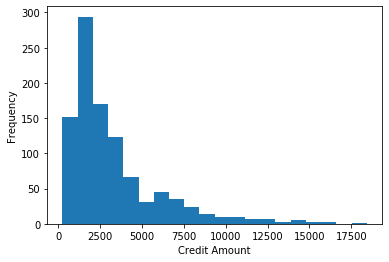

In [13]:
### Distribution of the continuous variables

plt.hist(Data["Credit Amount"], bins = 20)
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")


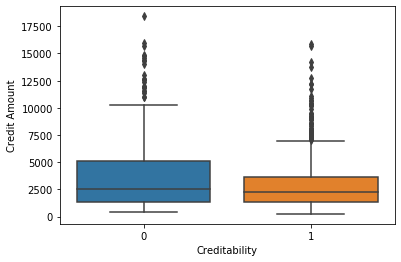

In [14]:
sns.boxplot(x=Data["Creditability"], y = Data["Credit Amount"])


Text(0, 0.5, 'Frequency')

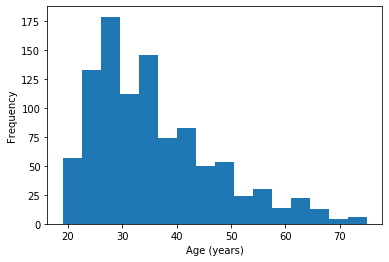

In [15]:
plt.hist(Data["Age (years)"], bins = 16)
plt.xlabel("Age (years)")
plt.ylabel("Frequency")

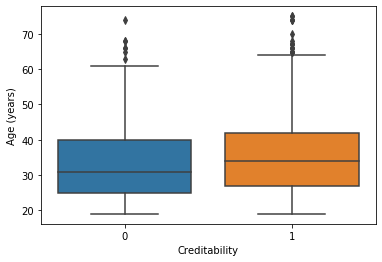

In [16]:
sns.boxplot(x=Data["Creditability"], y = Data["Age (years)"])


Text(0, 0.5, 'Frequency')

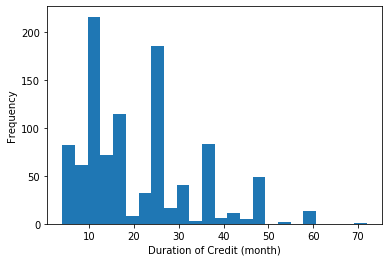

In [17]:
# Histogram for "Duration of Credit (month)"

plt.hist(Data["Duration of Credit (month)"], bins = 24)
plt.xlabel("Duration of Credit (month)")
plt.ylabel("Frequency")

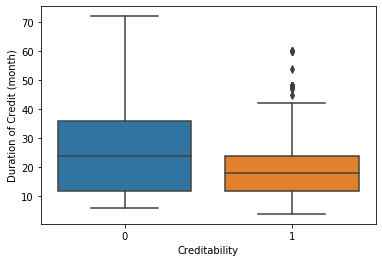

In [18]:
sns.boxplot(x=Data["Creditability"], y = Data["Duration of Credit (month)"])

In [19]:
category_list = ["Duration of Credit (month)", "Credit Amount", "Age (years)"]
Data_categorical = Data["Creditability"]
for col in Data:
    if col not in category_list:
        category_tab = pd.crosstab(columns = Data[col], index = "Percentage").apply(lambda r: (r/r.sum())*100, axis=1)
        category_tab.index = ["(%)"]
        print(category_tab)
        print

Creditability     0     1
(%)            30.0  70.0
Account Balance     1     2    3     4
(%)              27.4  26.9  6.3  39.4
Payment Status of Previous Credit    0    1     2    3     4
(%)                                4.0  4.9  53.0  8.8  29.3
Purpose    0     1     2     3    4    5    6    8    9    10
(%)      23.4  10.3  18.1  28.0  1.2  2.2  5.0  0.9  9.7  1.2
Value Savings/Stocks     1     2    3    4     5
(%)                   60.3  10.3  6.3  4.8  18.3
Length of current employment    1     2     3     4     5
(%)                           6.2  17.2  33.9  17.4  25.3
Instalment per cent     1     2     3     4
(%)                  13.6  23.1  15.7  47.6
Sex & Marital Status    1     2     3    4
(%)                   5.0  31.0  54.8  9.2
Guarantors     1    2    3
(%)         90.7  4.1  5.2
Duration in Current address     1     2     3     4
(%)                          13.0  30.8  14.9  41.3
Most valuable available asset     1     2     3     4
(%)                     

In [20]:
### Since most of the predictors are categorical with several levels, the full cross-classification of all variables will lead to
#zero observations in many cells. Hence we need to reduce the table size.

### Merging Account balance 3 & 4 assigning new values (No account (1), None (No balance) (2), Some Balance (3))
Data["Account Balance"].replace(4, 3, inplace = True)

In [22]:
Data["Account Balance"].unique()

array([1, 2, 3], dtype=int64)

In [23]:
### New Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)
Data["Payment Status of Previous Credit"].replace(0, 1, inplace = True)
Data["Payment Status of Previous Credit"].replace(4, 3, inplace = True)

In [24]:
### Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM
Data["Value Savings/Stocks"].replace(4, 3, inplace = True)
Data["Value Savings/Stocks"].replace(5, 4, inplace = True)

In [25]:
### Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7
Data["Length of current employment"].replace(2, 1, inplace = True)
Data["Length of current employment"].replace(3, 2, inplace = True)

Data["Length of current employment"].replace(4, 3, inplace = True)
Data["Length of current employment"].replace(5, 4, inplace = True)

In [26]:
### Occupation: Unemployed/Unskilled, Skilled, Executive
Data["Occupation"].replace(2, 1, inplace = True)
Data["Occupation"].replace(3, 2, inplace = True)
Data["Occupation"].replace(4, 3, inplace = True)

In [27]:
### Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female
Data["Sex & Marital Status"].replace(2, 1, inplace = True)
Data["Sex & Marital Status"].replace(3, 2, inplace = True)
Data["Sex & Marital Status"].replace(4, 3, inplace = True)

In [28]:
### No of Credits at this bank: 1, More than 1
Data["No of Credits at this Bank"].replace(3, 2, inplace = True)
Data["No of Credits at this Bank"].replace(4, 2, inplace = True)

In [29]:
### Guarantor: None, Yes
Data["Guarantors"].replace(3, 2, inplace = True)

In [30]:
### Concurrent Credits: Other Banks or Dept Stores, None
Data["Concurrent Credits"].replace(2, 1, inplace = True)
Data["Concurrent Credits"].replace(3, 2, inplace = True)

In [31]:
### Purpose of Credit: New car, Used car, Home Related, Other
Data["Purpose"].replace([3,4,5], 2, inplace = True)
Data["Purpose"].replace([6,7,8,9,10], 3, inplace = True)

In [33]:
category_list = ["Duration of Credit (month)", "Credit Amount", "Age (years)"]
Data_categorical = Data["Creditability"]
for col in Data:
    if col not in category_list:
        category_tab = pd.crosstab(columns = Data[col], index = "Percentage").apply(lambda r: (r/r.sum())*100, axis=1)
        category_tab.index = ["(%)"]
        print(category_tab)
        print


Creditability     0     1
(%)            30.0  70.0
Account Balance     1     2     3
(%)              27.4  26.9  45.7
Payment Status of Previous Credit    1     2     3
(%)                                8.9  53.0  38.1
Purpose     0     1     2     3
(%)      23.4  10.3  49.5  16.8
Value Savings/Stocks     1     2     3     4
(%)                   60.3  10.3  11.1  18.3
Length of current employment     1     2     3     4
(%)                           23.4  33.9  17.4  25.3
Instalment per cent     1     2     3     4
(%)                  13.6  23.1  15.7  47.6
Sex & Marital Status     1     2    3
(%)                   36.0  54.8  9.2
Guarantors     1    2
(%)         90.7  9.3
Duration in Current address     1     2     3     4
(%)                          13.0  30.8  14.9  41.3
Most valuable available asset     1     2     3     4
(%)                            28.2  23.2  33.2  15.4
Concurrent Credits     1     2
(%)                 18.6  81.4
Type of apartment     1     2     3


In [34]:
## Contingency table for Account Balance
acc_bal_tab1 = pd.crosstab(Data["Account Balance"], Data["Creditability"], margins = True)
acc_bal_tab1

Creditability,0,1,All
Account Balance,,,
1,135,139,274
2,105,164,269
3,60,397,457
All,300,700,1000


In [36]:
chi2, p, dof, exp = scipy.stats.chi2_contingency(acc_bal_tab1)
print(chi2)
print(p)
print(dof)
print(exp)

120.84376361168341
1.083531364440226e-23
6
[[  82.2  191.8  274. ]
 [  80.7  188.3  269. ]
 [ 137.1  319.9  457. ]
 [ 300.   700.  1000. ]]


In [37]:
col_list = []
for col in Data:
    col_list.append(col)

col_list

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex & Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

In [38]:
### Contingency tables and Chi-test for categorical variables
### Chi-square test of independence of variables in a contingency table.
sig_col_list = []
#category_col_list = ["Account Balance", "Payment Status of Previous Credit", "Value Savings/Stocks", "Length of current employment", "Sex & Marital Status", "No of Credits at this Bank", "Guarantors", "Concurrent Credits", "Type of apartment", "No of dependents", "Purpose", "Instalment per cent"]
for col in col_list:
    if col == "Creditability" or col =="Duration of Credit (month)" or col == "Credit Amount" or col == "Age (years)":
        pass
    else:
        contingency_tab = pd.crosstab(Data["Creditability"],Data[col], margins = True)
        print(contingency_tab)
        chi_stat, p_value, dof, expect_array  = scipy.stats.chi2_contingency(contingency_tab, correction = True)
        msg = "Chi Test Statistic: {}\np-value: {}\ndof: {}"
        print(msg.format(chi_stat, p_value, dof))
        print
        if p_value < 0.05: #Threshold probability of 0.05
            sig_col_list.append(col)
    

Account Balance    1    2    3   All
Creditability                       
0                135  105   60   300
1                139  164  397   700
All              274  269  457  1000
Chi Test Statistic: 120.84376361168343
p-value: 1.0835313644402181e-23
dof: 6
Payment Status of Previous Credit   1    2    3   All
Creditability                                        
0                                  53  169   78   300
1                                  36  361  303   700
All                                89  530  381  1000
Chi Test Statistic: 54.37609969095182
p-value: 6.194785616657e-10
dof: 6
Purpose          0    1    2    3   All
Creditability                          
0               89   17  132   62   300
1              145   86  363  106   700
All            234  103  495  168  1000
Chi Test Statistic: 22.558118924277036
p-value: 0.003980401807716201
dof: 8
Value Savings/Stocks    1    2    3    4   All
Creditability                                 
0                     21

In [39]:
print(sig_col_list)

['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 'Length of current employment', 'Most valuable available asset', 'Concurrent Credits', 'Type of apartment']


In [41]:
### Summary Statistics for Continuous Variables

continuous_list = ["Duration of Credit (month)", "Credit Amount", "Age (years)"]
for col in continuous_list:
    continuous_summary = Data[col].describe()
    print(col)
    print(continuous_summary)

Duration of Credit (month)
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration of Credit (month), dtype: float64
Credit Amount
count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit Amount, dtype: float64
Age (years)
count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: Age (years), dtype: float64


In [42]:
Data.groupby(["Creditability"])["Credit Amount", "Duration of Credit (month)", "Age (years)"].mean()

,Credit Amount,Duration of Credit (month),Age (years)
Creditability,,,
0,3938.126667,24.860000,33.96
1,2985.442857,19.207143,36.22


In [43]:
### Calculating P-value (T-TEST) for continuous variables - Credit Amount
df_credit_0 = Data[Data["Creditability"] == 0]["Credit Amount"]
df_credit_1 = Data[Data["Creditability"] == 1]["Credit Amount"]
t_stat, p_ttest = scipy.stats.ttest_ind(df_credit_0,df_credit_1)
print("Credit Amount")
if p_ttest <= 0.05:
    print("p_ttest is too low, so t_stat falls in critical region: Reject Null")
    sig_col_list.append("Credit Amount")
else:
    print("Fails to reject Null Hypothesis")

Credit Amount
p_ttest is too low, so t_stat falls in critical region: Reject Null


In [46]:
### Calculating P-value (T-TEST) for continuous variables - Duration of Credit

df_duration_0 = Data[Data["Creditability"] == 0]["Duration of Credit (month)"]
df_duration_1 = Data[Data["Creditability"] == 1]["Duration of Credit (month)"]
t_stat, p_ttest = scipy.stats.ttest_ind(df_duration_0,df_duration_1)
print("Duration of Credit (month)")
if p_ttest <= 0.05:
    print("p_ttest is too low, so t_stat falls in critical region: Reject Null")
    sig_col_list.append("Duration of Credit (month)")
else:
    print("Fails to reject Null Hypothesis")

Duration of Credit (month)
p_ttest is too low, so t_stat falls in critical region: Reject Null


In [47]:
### Calculating P-value (T-TEST) for continuous variables - AGE

df_age_0 = Data[Data["Creditability"] == 0]["Age (years)"]
df_age_1 = Data[Data["Creditability"] == 1]["Age (years)"]
t_stat, p_ttest = scipy.stats.ttest_ind(df_age_0,df_age_1)
print("Age (years)")
if p_ttest <= 0.05:
    print("p_ttest is too low, so t_stat falls in critical region: Reject Null")
    sig_col_list.append("Age (years)")

else:
    print("Fails to reject Null Hypothesis")

Age (years)
p_ttest is too low, so t_stat falls in critical region: Reject Null


In [48]:
sig_col_list

['Account Balance',
 'Payment Status of Previous Credit',
 'Purpose',
 'Value Savings/Stocks',
 'Length of current employment',
 'Most valuable available asset',
 'Concurrent Credits',
 'Type of apartment',
 'Credit Amount',
 'Duration of Credit (month)',
 'Age (years)']

In [49]:
features = Data[['Account Balance',
 'Payment Status of Previous Credit',
 'Purpose',
 'Value Savings/Stocks',
 'Length of current employment',
 'Most valuable available asset',
 'Concurrent Credits',
 'Type of apartment',
 'Credit Amount',
 'Duration of Credit (month)',
 'Age (years)']]

#features = np.array(features)

label = np.array(Data["Creditability"])


In [50]:
### Splitting data for training and test 50/50 for our Base Model - Logistic Regression

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.5, random_state = 1)

In [52]:
lrm = LogisticRegression()
lrm.fit(features_train, label_train)
print(lrm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Pardhu CooL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
pred = lrm.predict(features_test)

In [64]:
print("Score of training data: ", lrm.score(features_train, label_train))
print("Score of testing data: ", lrm.score(features_test, label_test))
#print(metrics.accuracy_score(label_test,pred))

Score of training data:  0.758
Score of testing data:  0.746


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test,pred)
sns.heatmap(cm,center=True)
plt.show()

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
pred1 = knn.predict(features_test)

In [63]:
print("Score of training data: ", lrm.score(features_train, label_train))
print("Score of testing data: ", lrm.score(features_test, label_test))
#print(metrics.accuracy_score(label_test,pred1))

Score of training data:  0.758
Score of testing data:  0.746


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test,pred1)
sns.heatmap(cm,center=True)
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,criterion='entropy')
rfc.fit(features_train,label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_pred_rfc=rfc.predict(features_test)

In [72]:
print("Score of training data: ", rfc.score(features_train, label_train))
print("Score of testing data: ", rfc.score(features_test, label_test))
#print(metrics.accuracy_score(label_test,y_pred_rfc))

Score of training data:  1.0
Score of testing data:  0.728


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test,y_pred_rfc)
sns.heatmap(cm,center=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(features_train, label_train)
y_pred_svc = clf.predict(features_test)

C:\Users\Pardhu CooL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test,y_pred_svc)
sns.heatmap(cm,center=True)
plt.show()

In [ ]:
# print "slope: ", lrm.coef_
# print "intercept: ", lrm.intercept_

In [ ]:
#metrics.confusion_matrix(label_test, pred)

In [58]:
pd.DataFrame(zip(features.columns, np.transpose(lrm.coef_)))

,0,1
0,Account Balance,[0.68484891020891]
1,Payment Status of Previous Credit,[0.336957919115302]
2,Purpose,[0.13102327549583304]
3,Value Savings/Stocks,[0.20594190870567142]
4,Length of current employment,[0.2690067283727931]
5,Most valuable available asset,[-0.35005652061871495]
6,Concurrent Credits,[-0.3499209964243381]
7,Type of apartment,[0.463525508748141]
8,Credit Amount,[1.3025870888420486e-05]
9,Duration of Credit (month),[-0.04611201652679574]
